In [1]:
import faircat
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# user-defined parameters
n_0=512
n_1=256
deg_0=8192
deg_1=4096
max_deg_0 = min(int(n_0/2**(9-8)),n_0)
max_deg_1 = min(int(n_1/2**(8-8)),n_1)
dist_type_0="normal"
dist_type_1="uniform"
k=3
d=6
corr_targets = {2: 0.80, 3: -0.10}

M = np.array([
    [0.6, 0.2, 0.2],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

D = np.array([
    [0.2, 0.1, 0.1],
    [0.2, 0.2, 0.2],
    [0.1, 0.1, 0.2]
])

H = np.array([
    [0.4, 0.5, 0.6],
    [0.6, 0.5, 0.4],
    [0.5, 0.5, 0.5],
    [0.3, 0.4, 0.6],
    [0.3, 0.4, 0.6]
])

Pcg = np.array([
    [0.7, 0.2, 0.1],  # value 0
    [0.2, 0.3, 0.5]   # value 1
])



In [ ]:
A,X,Label = faircat.faircat(n_0,n_1,deg_0, deg_1,k,d,max_deg_0, max_deg_1,dist_type_0, dist_type_1, Pcg, M,D,H,att_type="normal", corr_targets=corr_targets)

sum of degrees for group (target=8192): 8120
sum of degrees for group (target=4096): 4231
number of generated edges : 6168


corr(col 2, s) = 0.7999999999999982


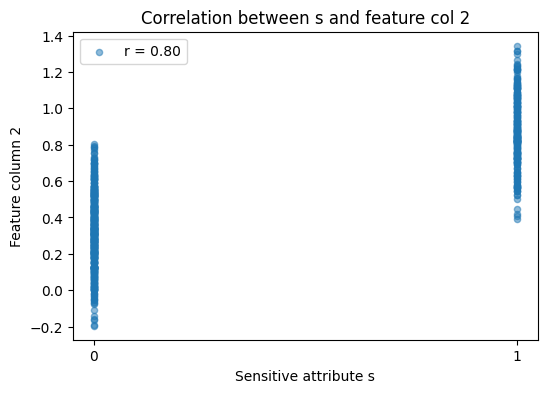

In [4]:
# show correlation between sensitive attribute s and feature column 2
s = X[:, 0].astype(float)
x2 = X[:, 2].astype(float)

r = float(np.corrcoef(x2, s)[0, 1])
print("corr(col 2, s) =", r)

plt.figure(figsize=(6,4))
plt.scatter(s, x2, alpha=0.5, s=20, label=f"r = {r:.2f}")
plt.xticks([0,1])
plt.xlabel("Sensitive attribute s")
plt.ylabel("Feature column 2")
plt.title("Correlation between s and feature col 2")
plt.legend()
plt.show()


corr(col 3, s) = -0.09999999999999981


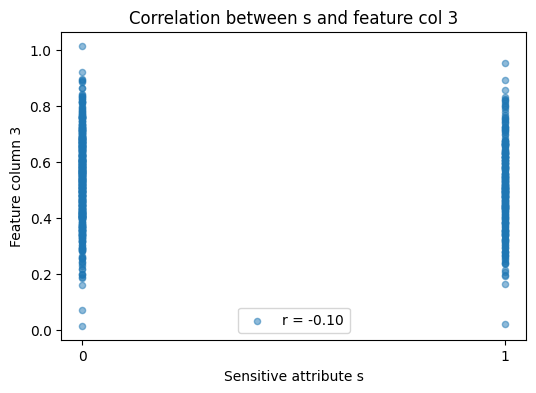

In [5]:
# show correlation between sensitive attribute s and feature column 3
s = X[:, 0].astype(float)
x3 = X[:, 3].astype(float)

r = float(np.corrcoef(x3, s)[0, 1])
print("corr(col 3, s) =", r)

plt.figure(figsize=(6,4))
plt.scatter(s, x3, alpha=0.5, s=20, label=f"r = {r:.2f}")
plt.xticks([0,1])
plt.xlabel("Sensitive attribute s")
plt.ylabel("Feature column 3")
plt.title("Correlation between s and feature col 3")
plt.legend()
plt.show()


In [ ]:
def count_edge_types(A, attribute):
    A = A.tocoo()

    inter_edges = 0
    intra_0_edges = 0
    intra_1_edges = 0

    for i, j in zip(A.row, A.col):
        if i >= j:
            continue  # Avoid duplicate undirected edges and self-loops
        attr_i = attribute[i]
        attr_j = attribute[j]

        if attr_i == attr_j == 0:
            intra_0_edges += 1
        elif attr_i == attr_j == 1:
            intra_1_edges += 1
        else:
            inter_edges += 1

    print(f"Intra-group (0): {intra_0_edges}")
    print(f"Intra-group (1): {intra_1_edges}")
    print(f"Inter-group    : {inter_edges}")

    return intra_0_edges, intra_1_edges, inter_edges
count_edge_types(A, X[:, 0])

Intra-group (0): 2767
Intra-group (1): 828
Inter-group    : 2573


(2767, 828, 2573)

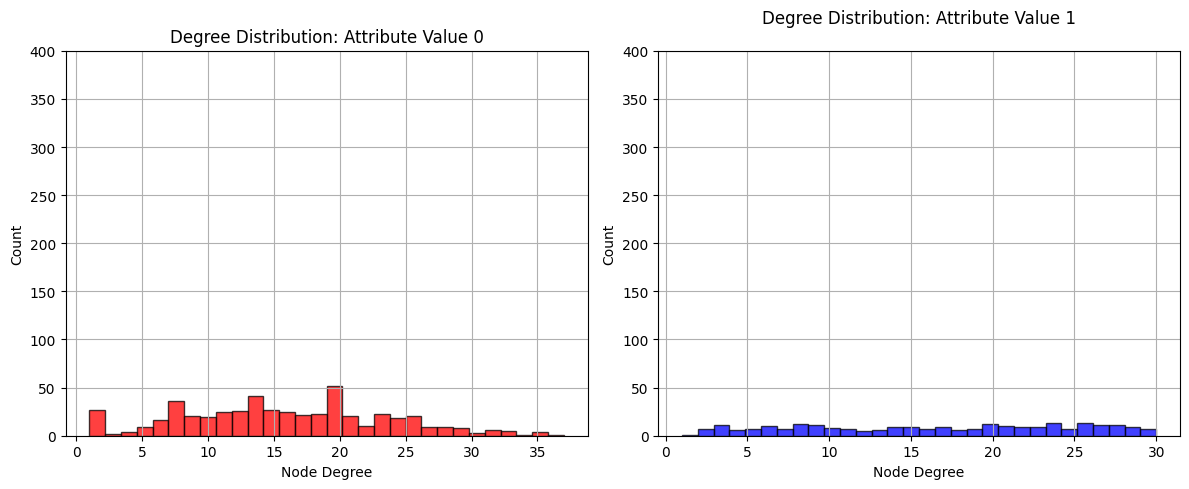

In [ ]:
def plot_degree_distributions_separate(A, attribute):
    A_csr = A.tocsr()
    degrees = np.array(A_csr.sum(axis=1)).flatten()
    attribute = np.array(attribute).flatten()

    degrees_attr_0 = degrees[attribute == 0]
    degrees_attr_1 = degrees[attribute == 1]

    plt.figure(figsize=(12, 5))

    # Plot for Attribute 0
    plt.subplot(1, 2, 1)
    plt.hist(degrees_attr_0, bins=30, color='red', edgecolor='black', alpha=0.75)
    plt.xlabel('Node Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution: Attribute Value 0')
    plt.grid(True)
    plt.ylim(0, 400)
    plt.yticks(np.arange(0, 401, 50))

    # Plot for Attribute 1
    plt.subplot(1, 2, 2)
    plt.hist(degrees_attr_1, bins=30, color='blue', edgecolor='black', alpha=0.75)
    plt.xlabel('Node Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution: Attribute Value 1', pad=20)
    plt.grid(True)
    plt.ylim(0, 400)
    plt.yticks(np.arange(0, 401, 50))

    plt.tight_layout()
    plt.show()
plot_degree_distributions_separate(A, X[:, 0])